In [36]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible


# I perform 1D Fourier transofrm of the 2D image by breaking it down into 1D strips along time (x-axis), this calculation was done in full resolution (taking all the pixel points)


Number of timepoints, N = 122

Sampling rate, DeltaT = 1 / 5 Hz

Total imaging time =  N / DeltaT, T = 610 seconds

Max frequency possible to be detected (from Shannon Nyquist theorem), fmax = DeltaT / 2 = 0.1 Hz

Resolution in frequency expected / peak width, deltaF = 2 * fmax / N = 0.0016

In [37]:
targetdir = '/Users/aimachine/Documents/KymoGraphsForFFT/NewResults/'
sourceimage = '/Users/aimachine/Documents/KymoGraphsForFFT/FullResolutionFirst.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)


Define some parameters for the FFT

In [38]:
#Enter time unit in seconds
Time_unit = 5
#Cut Section of image before the alst pixel
CutSectionAfter = 500
#Remove the first zero line if there, else put 0
CutSectionX = 1
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 500
#Range of Plot in Hertz
maxXrange = 0.1

Plot the 2D image to be Fourier transormed along the X axis

500   242


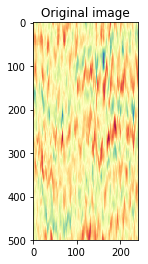

In [45]:
y = imread(sourceimage)

cutY = y[0:CutSectionAfter, :]

y = cutY

Xrange = y.shape[0]
Yrange = y.shape[1]
print(Xrange, " ", Yrange)
width = int(EndSection - StartSection)
block = int(Xrange / width)
cutX = y[:,CutSectionX:Yrange]

y = cutX
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')

Start = StartSection
End = EndSection

axes = 'XY'

Define the FFT function here, Take FFT of the strips and then add them up to get a single FFT plot showing the frequency

In [40]:

def doFilterFFT(image, filter):
   addedfft = 0 
   PointsSample = image.shape[1] 
   for i in range(image.shape[0]):
      if filter == True:   
       w = blackman(PointsSample)
      if filter == False:
       w = 1
      strip = image[i,:]
      fftresult = fft(w * strip)
      addedfft += np.abs(fftresult)  
   #addedfft/=image.shape[0]
   
   
   xf = fftfreq(PointsSample, Time_unit)
   
   
   return addedfft[1:int(PointsSample//2)], xf[1:int(PointsSample//2)]

Perform the FFT

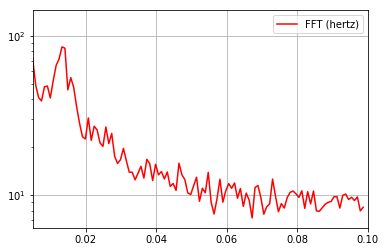

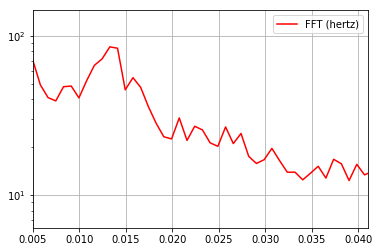

In [42]:
   
onedimg, frequ = doFilterFFT(y, False)

plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.1 )
plt.grid()
plt.legend(['FFT (hertz)']) 
plt.savefig(targetdir + 'Filtered_' + Filename[0] + '.png')
plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.041 )
plt.grid()
plt.legend(['FFT (hertz)']) 

# Now I demonstrate what happens to the peak if I did not have 242 time points in the calculation but a third of it (80), to demonstrate the effect of length of a signal on the FFT peak

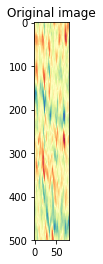

In [49]:
y = imread(sourceimage)

cutY = y[0:CutSectionAfter, :]

y = cutY

Xrange = y.shape[0]
Yrange = y.shape[1]

width = int(EndSection - StartSection)
block = int(Xrange / width)
cutX = y[:,CutSectionX:int(Yrange/3)]

y = cutX
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')

Start = StartSection
End = EndSection

axes = 'XY'

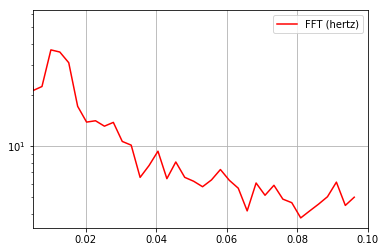

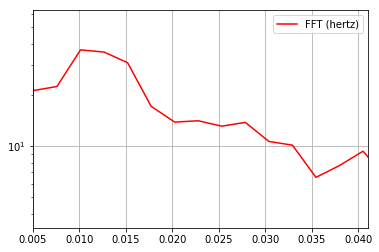

In [50]:
   
onedimg, frequ = doFilterFFT(y, False)

plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.1 )
plt.grid()
plt.legend(['FFT (hertz)']) 
plt.savefig(targetdir + 'Filtered_' + Filename[0] + '.png')
plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.041 )
plt.grid()
plt.legend(['FFT (hertz)']) 

The peak degenrates and this is because longer the signal more frequency content it has in the Fourier space which you can see when you do the FFT, for a smaller signal the frequency content is less and the peak position becomes more uncertain, the width of the peak is inversely propotional to the signal duration, for infinite signals you get delta function peaks for monochromatic signals

# Now I demonstrate the effect of downsampling while making the 2D image, in this approach one of 5 pixels was skipped to obtain the 2D image I will display below 

In [51]:
targetdir = '/Users/aimachine/Documents/KymoGraphsForFFT/NewResults/'
sourceimage = '/Users/aimachine/Documents/KymoGraphsForFFT/FifthResolutionFirst.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)

In [56]:
#Enter time unit in seconds
Time_unit = 5
#Cut Section of image before the alst pixel
CutSectionAfter = 80
#Remove the first zero line if there, else put 0
CutSectionX = 1
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 80
#Range of Plot in Hertz
maxXrange = 0.1

80   242


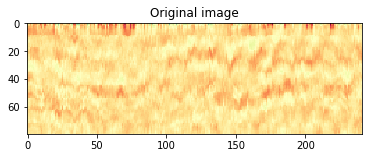

In [57]:
y = imread(sourceimage)

cutY = y[0:CutSectionAfter, :]

y = cutY

Xrange = y.shape[0]
Yrange = y.shape[1]
print(Xrange, " ", Yrange)
width = int(EndSection - StartSection)
block = int(Xrange / width)
cutX = y[:,CutSectionX:Yrange]

y = cutX
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')

Start = StartSection
End = EndSection

axes = 'XY'

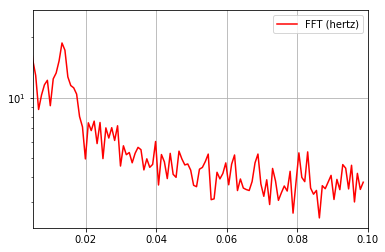

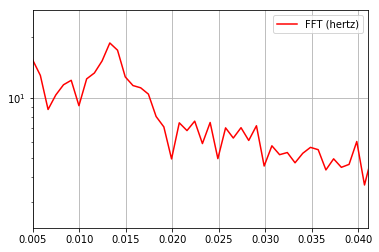

In [58]:
   
onedimg, frequ = doFilterFFT(y, False)

plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.1 )
plt.grid()
plt.legend(['FFT (hertz)']) 
plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.041 )
plt.grid()
plt.legend(['FFT (hertz)']) 

Notice the change in the shape of the peak, if now we additionally decrease the time over which the experiment was performed from 240 * 5 seconds to 80 * 5 seconds the peak quality would degenrate as I show below

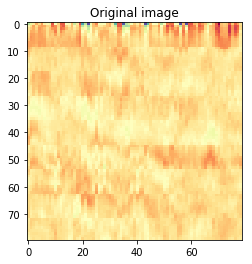

In [59]:
y = imread(sourceimage)

cutY = y[0:CutSectionAfter, :]

y = cutY

Xrange = y.shape[0]
Yrange = y.shape[1]

width = int(EndSection - StartSection)
block = int(Xrange / width)
cutX = y[:,CutSectionX:int(Yrange/3)]

y = cutX
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')

Start = StartSection
End = EndSection

axes = 'XY'

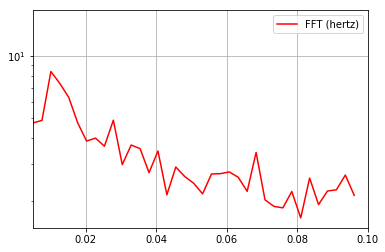

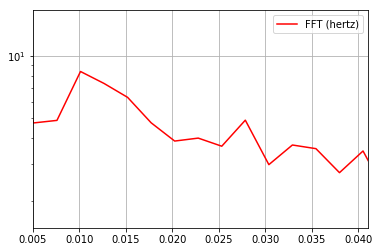

In [60]:
   
onedimg, frequ = doFilterFFT(y, False)

plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.1 )
plt.grid()
plt.legend(['FFT (hertz)']) 
plt.savefig(targetdir + 'Filtered_' + Filename[0] + '.png')
plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.041 )
plt.grid()
plt.legend(['FFT (hertz)']) 

# Overall Conclusion: 
1) Do experiments over longer time to have sufficient spectral resolution seen in terms of the peak with in the Fourier space.
2) Do not downsample while computing the 2D images you intended to Fourier Transform especially if you were limited by the duration over which you could image your samples in the experiments. 